
# Question 1


In [3]:
import pandas as pd
link = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(link, sep='|')
mean_age = users.groupby('occupation')['age'].mean()
male_ratio = users[users['gender'] == 'Male'].groupby('occupation').size() / users.groupby('occupation').size()
male_ratio = male_ratio.sort_values(ascending=False)
age_range = users.groupby('occupation')['age'].agg([min, max])
mean_age_per_occupation = users.groupby(['occupation', 'gender'])['age'].mean()
gender_percentage = users.groupby(['occupation', 'gender']).size() / users.groupby('occupation').size()
print("Mean Age per Occupation:")
print(mean_age)
print("\nMale Ratio per Occupation (sorted):")
print(male_ratio)
print("\nAge Range per Occupation:")
print(age_range)
print("\nMean Age per Occupation and Gender:")
print(mean_age_per_occupation)
print("\nPercentage of Women and Men per Occupation:")
print(gender_percentage)

Mean Age per Occupation:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male Ratio per Occupation (sorted):
occupation
administrator   NaN
artist          NaN
doctor          NaN
educator        NaN
engineer        NaN
entertainment   NaN
executive       NaN
healthcare      NaN
homemaker       NaN
lawyer          NaN
librarian       NaN
marketing       NaN
none            NaN
other           NaN
programmer      NaN
retired         NaN
sal

# Question 2

In [4]:
import pandas as pd
q2_link = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(q2_link)
goals_column = euro12["Goals"]
num_teams_ = euro12.shape[0]
num_columns = euro12.shape[1]
discipline = euro12[["Team", "Yellow Cards", "Red Cards"]]
discipline_sorted = discipline.sort_values(by=["Red Cards", "Yellow Cards"])
mean_yellow_cards = euro12["Yellow Cards"].mean()
more_than_6_goals = euro12[euro12["Goals"] > 6]
teams_G = euro12[euro12["Team"].str.startswith("G")]
first_7 = euro12.iloc[:, :7]
all_except_last_3 = euro12.iloc[:, :-3]
shooting_accuracy = euro12.loc[euro12["Team"].isin(["England", "Italy", "Russia"]), ["Team", "Shooting Accuracy"]]
print("Number of teams participated in Euro 2012:", num_teams_)
print("Number of columns in the dataset:", num_columns)
print("Mean Yellow Cards given per Team:", mean_yellow_cards)
print("\nDiscipline DataFrame:")
print(discipline_sorted)
print("\nTeams that scored more than 6 goals:")
print(more_than_6_goals)
print("\nTeams starting with G:")
print(teams_G)
print("\nFirst 7 columns:")
print(first_7)
print("\nAll columns except the last 3:")
print(all_except_last_3_columns)
print("\nShooting Accuracy for England, Italy, and Russia:")
print(shooting_accuracy)


Number of teams participated in Euro 2012: 16
Number of columns in the dataset: 35
Mean Yellow Cards given per Team: 7.4375

Discipline DataFrame:
                   Team  Yellow Cards  Red Cards
2               Denmark             4          0
5               Germany             4          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
4                France             6          0
12               Russia             6          0
1        Czech Republic             7          0
14               Sweden             7          0
0               Croatia             9          0
13                Spain            11          0
10             Portugal            12          0
7                 Italy            16          0
11  Republic of Ireland             6          1
9                Poland             7          1
6                Greece             9          1

Teams that scored m

NameError: name 'all_except_last_3_columns' is not defined

# Question 3 

In [5]:
import pandas as pd
import numpy as np
q3_1 = pd.Series(np.random.randint(1, 2, size=100))
q3_2 = pd.Series(np.random.randint(1, 3, size=100))
q3_3 = pd.Series(np.random.randint(10000, 29001, size=100))
df_q3 = pd.concat([q3_1, q3_2, q3_3], axis=1)
df_q3.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
big_column = pd.concat([q3_1, q3_2, q3_3], ignore_index=True)
print("Is it true that 'bigcolumn' goes only until index 99?", big_column.index.max() == 99)
df_q3 = df_q3.reset_index(drop=True)
df_q3 = df_q3.reindex(range(300))
print("\nReindexed DataFrame:")
print(df_q3)

Is it true that 'bigcolumn' goes only until index 99? False

Reindexed DataFrame:
     bedrs  bathrs  price_sqr_meter
0      1.0     2.0          18502.0
1      1.0     2.0          27468.0
2      1.0     2.0          18880.0
3      1.0     1.0          22892.0
4      1.0     2.0          20192.0
..     ...     ...              ...
295    NaN     NaN              NaN
296    NaN     NaN              NaN
297    NaN     NaN              NaN
298    NaN     NaN              NaN
299    NaN     NaN              NaN

[300 rows x 3 columns]


# Question 4                                            

In [7]:
import pandas as pd
import numpy as np
data = pd.read_csv('wind.txt', delim_whitespace=True, parse_dates=[[0, 1, 2]])
def fix_year(year):
    if year > 2000:
        return year - 100
    else:
        return year
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(lambda x: pd.Timestamp(year=fix_year(x.year), month=x.month, day=x.day))
data.set_index('Yr_Mo_Dy', inplace=True)
missing_values = data.isnull().sum()
non_missing_values = data.count().sum()
mean_wind_speed = data.mean().mean()
loc_stats_q4 = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std()
})
day_stats_q4 = pd.DataFrame({
    'min': data.min(axis=1),
    'max': data.max(axis=1),
    'mean': data.mean(axis=1),
    'std': data.std(axis=1)
})
january_avg_q4 = data[data.index.month == 1].mean()
data_yearly_q4= data.resample('Y').mean()
data_monthly_q4 = data.resample('M').mean()
data_weekly_q4 = data.resample('W').mean()
weekly_stats_q4 = data_weekly_q4.loc['1961-01-02':'1961-01-01'].head(52).agg(['min', 'max', 'mean', 'std'])
print("Missing values per location:\n", missing_values)
print("\nTotal non-missing values:", non_missing_values)
print("\nMean windspeed over all locations and times:", mean_wind_speed)
print("\nLocation statistics:\n", loc_stats_q4)
print("\nDay statistics:\n", day_stats_q4)
print("\nAverage windspeed in January:\n", january_avg_q4)
print("\nYearly downsampled data:\n", data_yearly_q4)
print("\nMonthly downsampled data:\n", data_monthly_q4)
print("\nWeekly downsampled data:\n", data_weekly_q4)
print("\nWeekly statistics for the first 52 weeks:\n", weekly_stats_q4)

Missing values per location:
 RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Total non-missing values: 78857

Mean windspeed over all locations and times: 10.227982360836938

Location statistics:
       min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794

Day statistics:
              min    max       mean       std
Yr_Mo_Dy                                    
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  

# Question 5

In [8]:
import pandas as pd
link = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(link, delimiter='\t') 
print(chipo.head(10))
number_observations = len(chipo)
print("Number of observations:", number_observations)
number_columns = len(chipo.columns)
print("Number of columns:", number_columns)
print("Columns:", chipo.columns.tolist())
print("Index:", chipo.index)
most_ordered = chipo['item_name'].mode().iloc[0]
print("Most-ordered item:", most_ordered)
ordered_quantity = chipo[chipo['item_name'] == most_ordered]['quantity'].sum()
print("Quantity ordered for the most-ordered item:", ordered_quantity)
ordered_choice = chipo['choice_description'].mode().iloc[0]
print("Most-ordered item in 'choice_description' column:", ordered_choice)
total_items = chipo['quantity'].sum()
print("Total items ordered:", total_items)
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
revenue_q5 = (chipo['quantity'] * chipo['item_price']).sum()
print("Total revenue:", revenue_q5)
num_orders_q5 = chipo['order_id'].nunique()
print("Number of orders:", num_orders_q5)
average_revenue = revenue_q5 / num_orders_q5
print("Average revenue per order:", average_revenue)
different_items_sold = chipo['item_name'].nunique()
print("Number of different items sold:", different_items_sold)


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

# Question 6

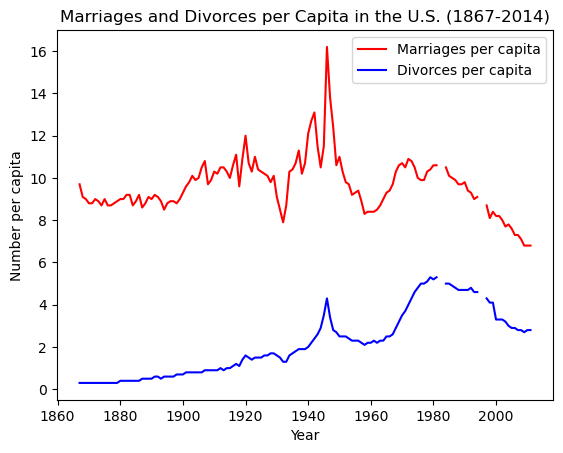

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
url_q6 = 'us-marriages-divorces-1867-2014.csv'
data_q6 = pd.read_csv(url_q6)
years_q6 = data_q6['Year']
marriage_per_capita = data_q6['Marriages_per_1000']
divorce_per_capita = data_q6['Divorces_per_1000']
plt.plot(years_q6, marriage_per_capita, label='Marriages per capita', color='red')
plt.plot(years_q6, divorce_per_capita, label='Divorces per capita', color='blue')
plt.xlabel('Year')
plt.ylabel('Number per capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()
plt.show()

# Question 7

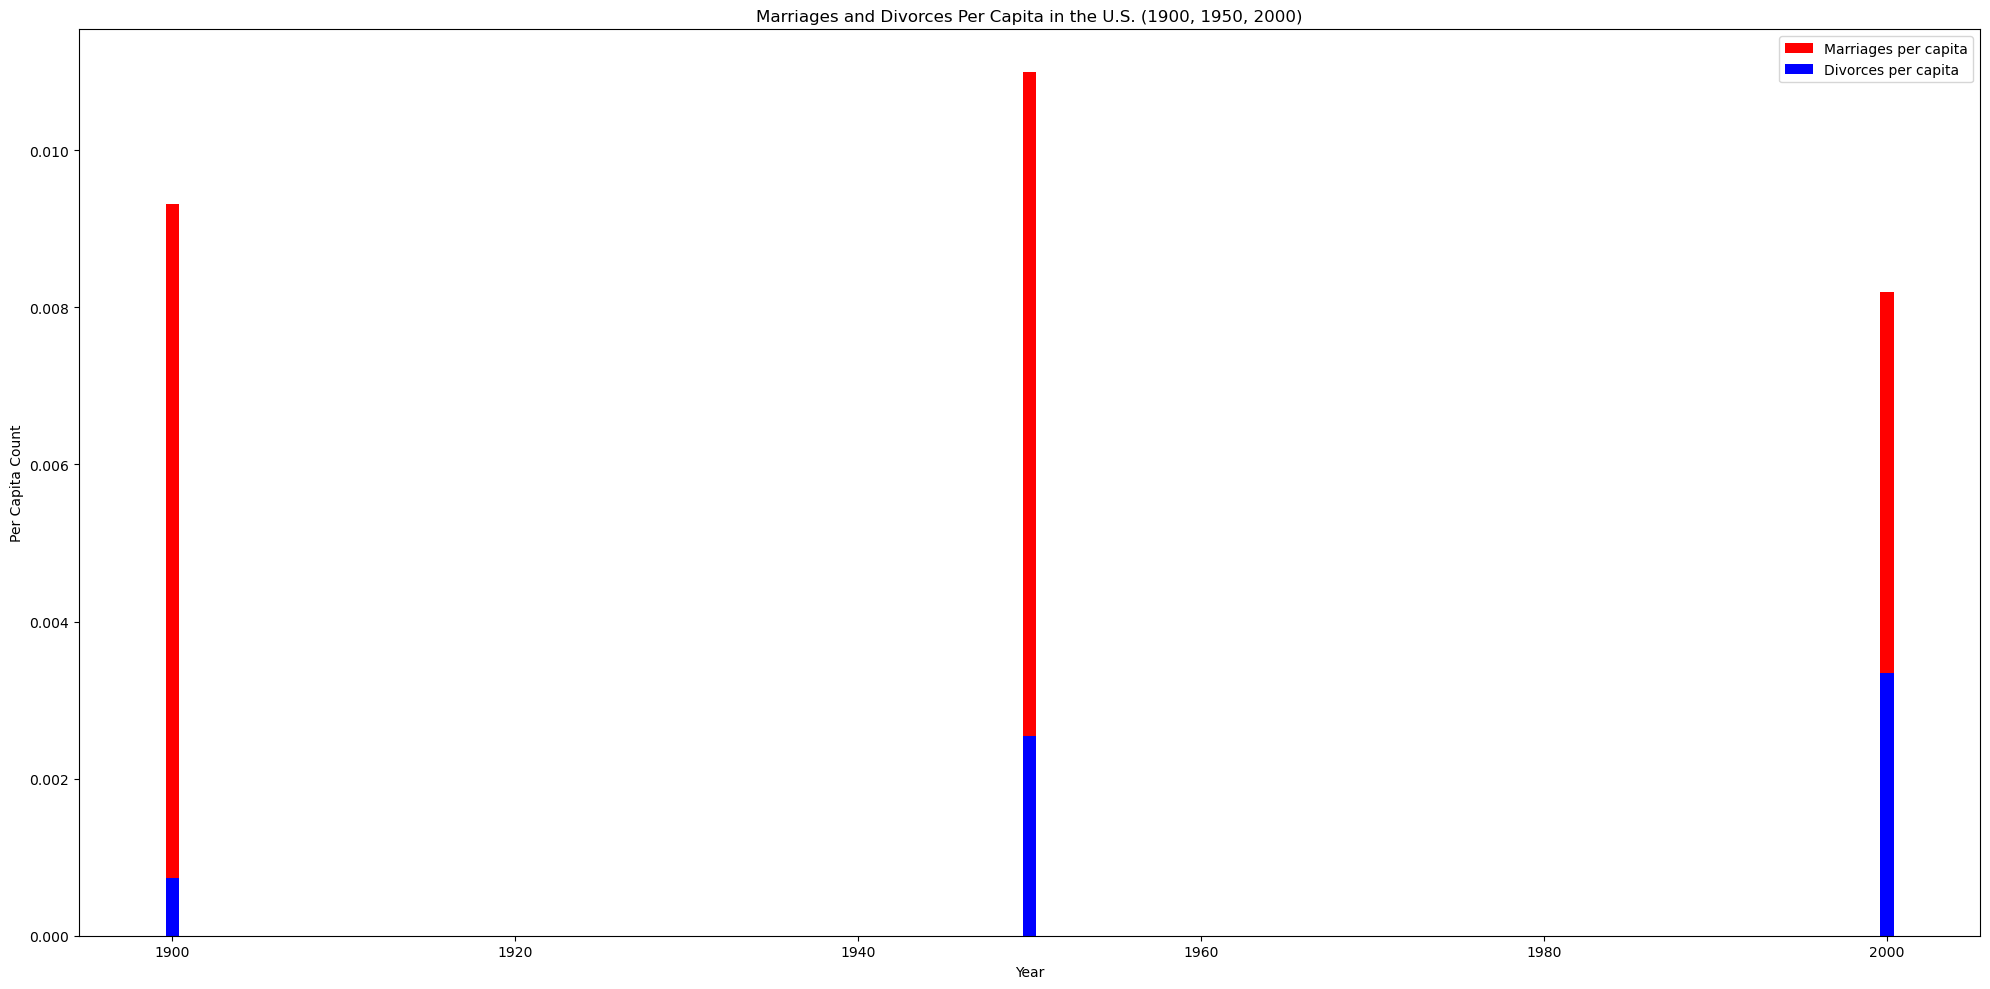

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import io
data_str = '''
Year,Marriages,Divorces,Population
1900,709000,56000,76094000
1950,1667000,385000,151684000
2000,2315000,944000,282398000
'''
data_q7 = pd.read_csv(io.StringIO(data_str))
years_q7 = [1900, 1950, 2000]
filtered_data_q7 = data_q7[data_q7["Year"].isin(years_q7)]
filtered_data_q7["Marriages_per_capita"] = filtered_data_q7["Marriages"] / filtered_data_q7["Population"]
filtered_data_q7["Divorces_per_capita"] = filtered_data_q7["Divorces"] / filtered_data_q7["Population"]
plt.figure(figsize=(20, 10))
plt.bar(filtered_data_q7["Year"], filtered_data_q7["Marriages_per_capita"], color="red", label="Marriages per capita")
plt.bar(filtered_data_q7["Year"], filtered_data_q7["Divorces_per_capita"], color="blue", label="Divorces per capita")
plt.xlabel("Year")
plt.ylabel("Per Capita Count")
plt.title("Marriages and Divorces Per Capita in the U.S. (1900, 1950, 2000)")
plt.legend()
plt.tight_layout()
plt.show()

# Question 8

In [15]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


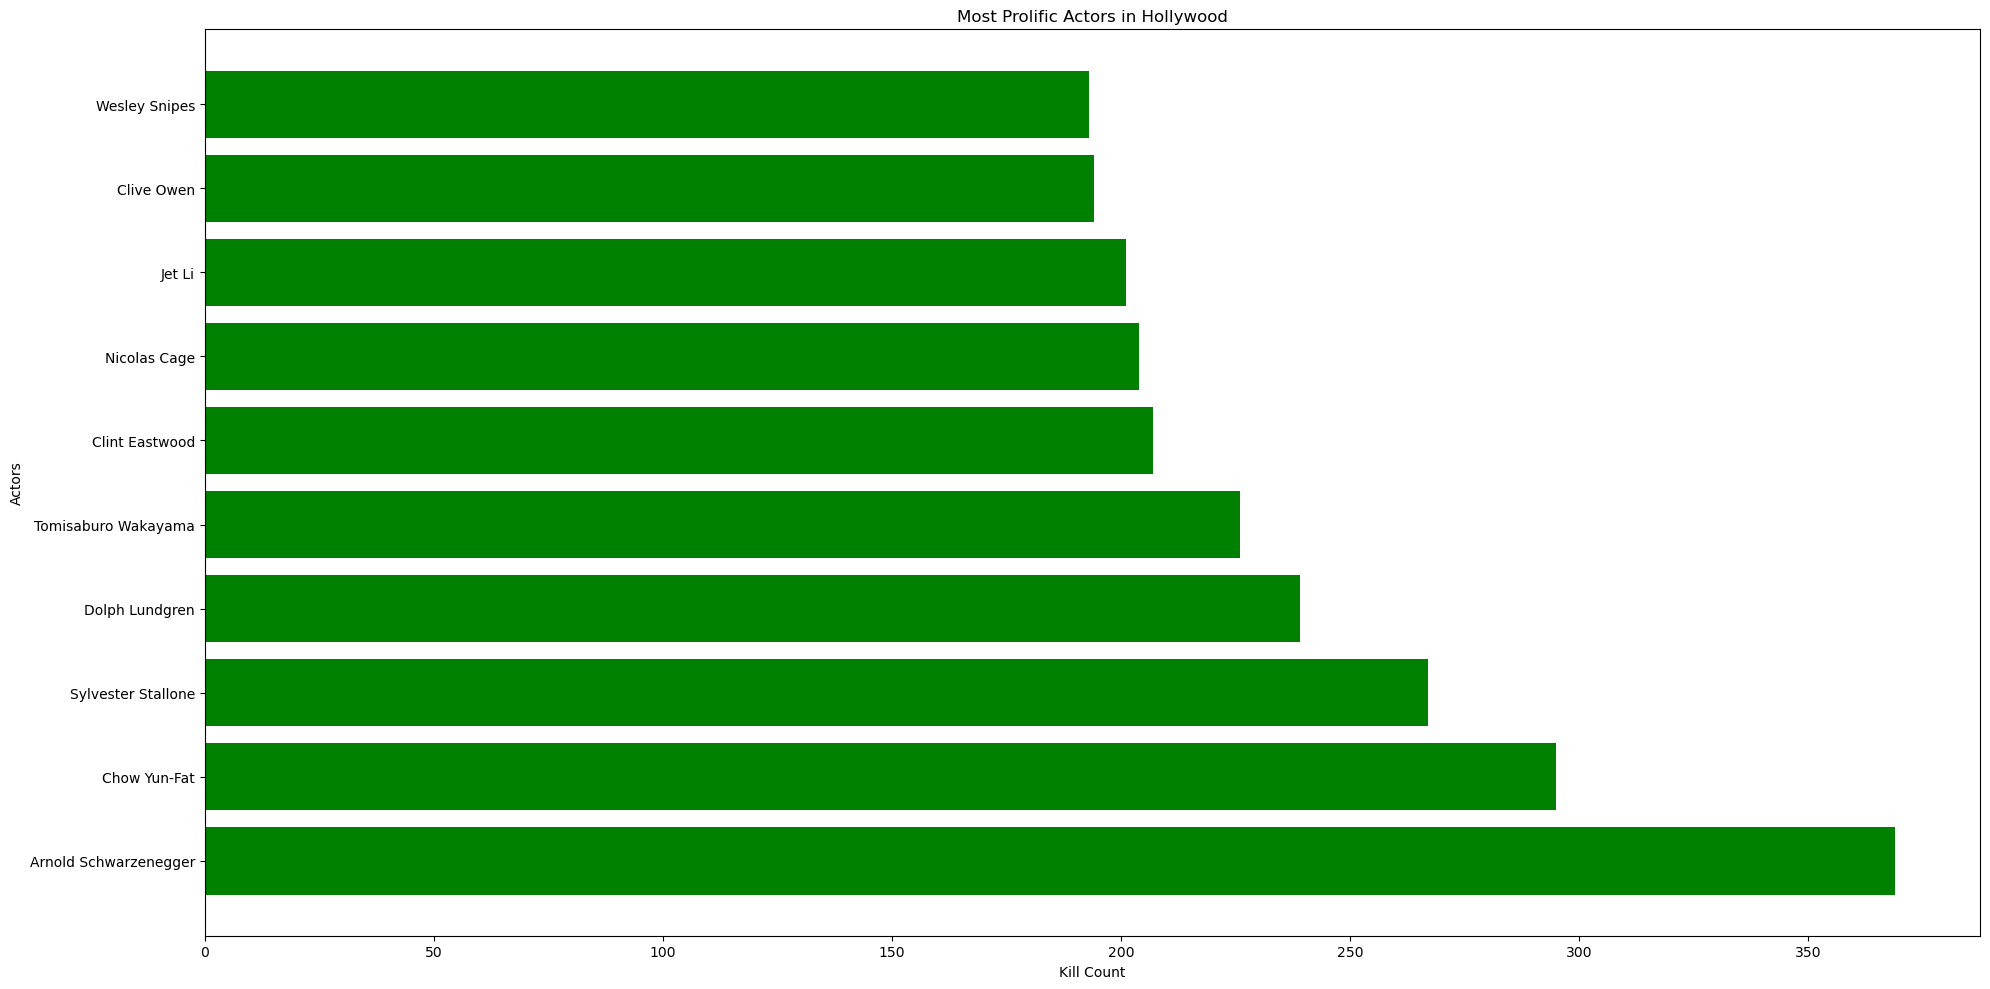

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('actor_kill_counts.csv')
sorted_data = data.sort_values(by='Count', ascending=False)
plt.figure(figsize=(20, 10))
plt.barh(sorted_data['Actor'], sorted_data['Count'], color='green')  
plt.xlabel('Kill Count')
plt.ylabel('Actors')
plt.title('Most Prolific Actors in Hollywood')
plt.tight_layout()
plt.show()

# Question 9

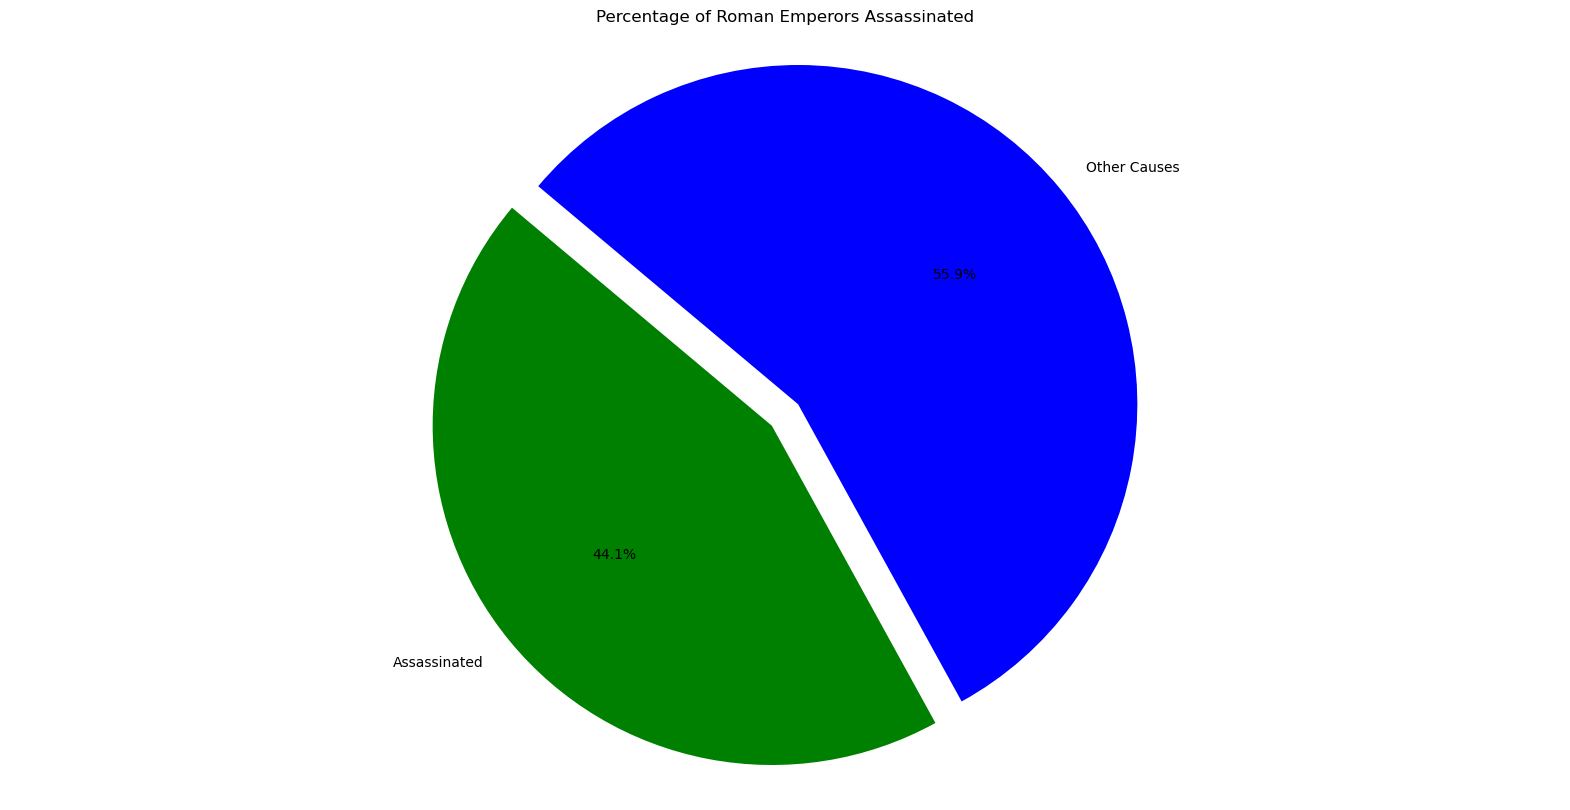

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
data_q9 = pd.read_csv('roman-emperor-reigns.csv')
count_assassinated = data_q9[data_q9["Cause_of_Death"].str.contains("Assassinated", case=False, na=False)].shape[0]
total_emperors = data_q9.shape[0]
assassinated_percentage = (count_assassinated / total_emperors) * 100
other_causes = 100 - assassinated_percentage
labels = ["Assassinated", "Other Causes"]
sizes = [assassinated_percentage, other_causes]
colors = ["green", "blue"]  
explode = (0.1, 0)  
plt.figure(figsize=(20, 10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("Percentage of Roman Emperors Assassinated")
plt.axis("equal")
plt.show()

# Question 10

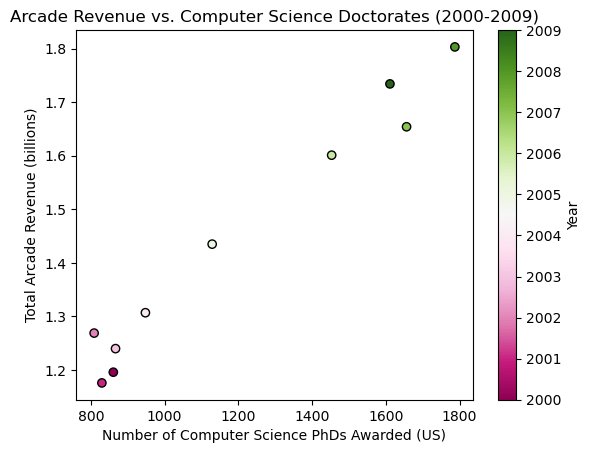

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
data_q10 = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
years_q10 = data_q10['Year']
revenue_q10 = data_q10['Total Arcade Revenue (billions)']
doctorates_q10 = data_q10['Computer Science Doctorates Awarded (US)']
plt.scatter(doctorates_q10, revenue_q10, c=years_q10, cmap='PiYG', edgecolors='k') 
plt.xlabel('Number of Computer Science PhDs Awarded (US)')
plt.ylabel('Total Arcade Revenue (billions)')
plt.title('Arcade Revenue vs. Computer Science Doctorates (2000-2009)')
cbar = plt.colorbar()
cbar.set_label('Year')
plt.show()